In [1]:
import pandas as pd
import numpy as np
from astropy.stats import median_absolute_deviation
import matplotlib.pyplot as plt

In [2]:
war_df = pd.read_csv("war_daily_bat.csv")
offense_df = pd.read_csv("Batting.csv")

Our analysis will not include the entire set of data, so we will remove many of the columns.
The data is removed in sets so subsets can be easily included in future analyses.

In [3]:
war_df = war_df.drop(columns=["team_ID","stint_ID","lg_ID","mlb_ID"])
war_df = war_df.drop(columns=["runs_bat","Inn","runs_br","runs_dp"])
war_df = war_df.drop(columns=["runs_field","runs_infield","runs_outfield","runs_catcher","runs_good_plays","runs_defense","runs_position","runs_position_p"])
war_df = war_df.drop(columns=["runs_replacement","runs_above_rep","runs_above_avg","runs_above_avg_off","runs_above_avg_def"])
war_df = war_df.drop(columns=["WAA","WAA_off","WAA_def","WAR_def","WAR_rep"])
war_df = war_df.drop(columns=["salary"])
war_df = war_df.drop(columns=["teamRpG","oppRpG","oppRpPA_rep","oppRpG_rep"])
war_df = war_df.drop(columns=["pyth_exponent","pyth_exponent_rep","waa_win_perc","waa_win_perc_off","waa_win_perc_def","waa_win_perc_rep"])
war_df = war_df.drop(columns=["TOB_lg","TB_lg"])

In [4]:
offense_df = offense_df.drop(columns=["stint","teamID","lgID"])
offense_df = offense_df.drop(columns=["G","IBB","HBP","SH","SF","GIDP","SB","CS","SO"])

Because we are relying on aggregate statistics, we remove players who have not played in at least half the games or pitchers who didn't appear at least 20 times to prevent skew.
The base analysis included all individuals within this time period.  The same methodology was also performed excluding pitchers, and performed for only players over the age of 32 to examine the impact of steroid use on player aging

In [5]:
war_df = war_df.rename(index=str,columns={"name_common":"name","year_ID":"year"})
war_df = war_df[(war_df["G"]>81) | ((war_df["pitcher"]=="Y") & (war_df["G"]>20))]
war_df = war_df.drop(columns=["pitcher"])

#war_df = war_df[(war_df["age"]>32)]
#war_df = war_df.drop(columns=["pitcher"])

In [6]:
#print(war_df.head(5))

In [7]:
#print(offense_df.head(5))

The 'steroid era' is often taken as the decade between 1993 and 2002 when they were most prominent.
To simplify analysis, we use time periods of equal size before and after that era.

In [8]:
full_df = war_df[(war_df["year"]>1982) & (war_df["year"]<2013)].sort_values("WAR")
pre_steroid_df = full_df[full_df["year"]<1993]
post_steroid_df = full_df[full_df["year"]>2002]
steroid_df = full_df[(full_df["year"]<2003) & (full_df["year"]>1992)]

The analysis relies on "robust z-score", which mimics the standard z-score but uses median and median absolute deviation for metrics. The base analysis was for All-Star caliber players, representing the top 10% of players.  A second analysis was performed for MVP-caliber players, representing the top 10 players. 

In [17]:
full_WAR_median = np.median(full_df["WAR"])
full_WAR_mad = median_absolute_deviation(full_df["WAR"])

full_WAR_player = full_df['WAR'].groupby(full_df["name"])

full_player_WAR = full_WAR_player.aggregate(np.sum).sort_values()
full_player_WAR_median = np.median(full_player_WAR)
full_player_WAR_mad = median_absolute_deviation(full_player_WAR)

full_WAR_RZ_score_sorted = ((full_df["WAR"] - full_WAR_median)/full_WAR_mad).sort_values()

full_player_WAR_RZ_score_sorted = ((full_player_WAR - full_player_WAR_median)/full_player_WAR_mad).sort_values()


full_WAR_RZ_score_90_perc_WAR = full_WAR_RZ_score_sorted.quantile(q=0.9)
#full_WAR_RZ_score_90_perc_WAR = full_WAR_RZ_score_sorted.quantile(q=(full_WAR_RZ_score_sorted.count()-11)/(full_WAR_RZ_score_sorted.count()))

full_WAR_RZ_score_90_perc_WAR_count = full_WAR_RZ_score_sorted[full_WAR_RZ_score_sorted<full_WAR_RZ_score_90_perc_WAR].count() 

                            
full_player_WAR_RZ_score_90_perc_WAR = full_player_WAR_RZ_score_sorted.quantile(q=0.9)
#full_player_WAR_RZ_score_90_perc_WAR = full_player_WAR_RZ_score_sorted.quantile((full_player_WAR_RZ_score_sorted.count()-11)/(full_player_WAR_RZ_score_sorted.count()))

                        
full_player_WAR_RZ_score_90_perc_WAR_count = full_player_WAR_RZ_score_sorted[full_player_WAR_RZ_score_sorted<full_player_WAR_RZ_score_90_perc_WAR].count() 



In [18]:
pre_steroid_WAR_median = np.median(pre_steroid_df["WAR"])
pre_steroid_WAR_mad = median_absolute_deviation(pre_steroid_df["WAR"])

pre_steroid_WAR_player = pre_steroid_df['WAR'].groupby(full_df["name"])

pre_steroid_player_WAR = pre_steroid_WAR_player.aggregate(np.sum).sort_values()
pre_steroid_player_WAR_median = np.median(pre_steroid_player_WAR)
pre_steroid_player_WAR_mad = median_absolute_deviation(pre_steroid_player_WAR)

pre_steroid_WAR_RZ_score_sorted = ((pre_steroid_df["WAR"] - pre_steroid_WAR_median)/pre_steroid_WAR_mad).sort_values()
pre_steroid_player_WAR_RZ_score_sorted = ((pre_steroid_player_WAR - pre_steroid_player_WAR_median)/pre_steroid_player_WAR_mad).sort_values()



pre_steroid_WAR_RZ_score_90_perc_WAR = pre_steroid_WAR_RZ_score_sorted.quantile(q=0.9)
#pre_steroid_WAR_RZ_score_90_perc_WAR = pre_steroid_WAR_RZ_score_sorted.quantile(q=(pre_steroid_WAR_RZ_score_sorted.count()-11)/(pre_steroid_WAR_RZ_score_sorted.count()))

pre_steroid_WAR_RZ_score_90_perc_WAR_count = pre_steroid_WAR_RZ_score_sorted[pre_steroid_WAR_RZ_score_sorted<pre_steroid_WAR_RZ_score_90_perc_WAR].count() 

pre_steroid_player_WAR_RZ_score_90_perc_WAR = pre_steroid_player_WAR_RZ_score_sorted.quantile(q=0.9)
#pre_steroid_player_WAR_RZ_score_90_perc_WAR = pre_steroid_player_WAR_RZ_score_sorted.quantile(q=(pre_steroid_player_WAR_RZ_score_sorted.count()-11)/(pre_steroid_player_WAR_RZ_score_sorted.count()))


pre_steroid_player_WAR_RZ_score_90_perc_WAR_count = pre_steroid_player_WAR_RZ_score_sorted[pre_steroid_player_WAR_RZ_score_sorted<pre_steroid_player_WAR_RZ_score_90_perc_WAR].count() 


In [19]:
post_steroid_WAR_median = np.median(post_steroid_df["WAR"])
post_steroid_WAR_mad = median_absolute_deviation(post_steroid_df["WAR"])

post_steroid_WAR_player = post_steroid_df['WAR'].groupby(full_df["name"])

post_steroid_player_WAR = post_steroid_WAR_player.aggregate(np.sum).sort_values()
post_steroid_player_WAR_median = np.median(post_steroid_player_WAR)
post_steroid_player_WAR_mad = median_absolute_deviation(post_steroid_player_WAR)

post_steroid_WAR_RZ_score_sorted = ((post_steroid_df["WAR"] - post_steroid_WAR_median)/post_steroid_WAR_mad).sort_values()
post_steroid_player_WAR_RZ_score_sorted = ((post_steroid_player_WAR - post_steroid_player_WAR_median)/post_steroid_player_WAR_mad).sort_values()


post_steroid_WAR_RZ_score_90_perc_WAR = post_steroid_WAR_RZ_score_sorted.quantile(q=0.9)
#post_steroid_WAR_RZ_score_90_perc_WAR = post_steroid_WAR_RZ_score_sorted.quantile(q=(post_steroid_WAR_RZ_score_sorted.count()-11)/(post_steroid_WAR_RZ_score_sorted.count()))


post_steroid_WAR_RZ_score_90_perc_WAR_count = post_steroid_WAR_RZ_score_sorted[post_steroid_WAR_RZ_score_sorted<post_steroid_WAR_RZ_score_90_perc_WAR].count()


post_steroid_player_WAR_RZ_score_90_perc_WAR = post_steroid_player_WAR_RZ_score_sorted.quantile(q=0.9)
#post_steroid_player_WAR_RZ_score_90_perc_WAR = post_steroid_player_WAR_RZ_score_sorted.quantile((post_steroid_player_WAR_RZ_score_sorted.count()-11)/(post_steroid_player_WAR_RZ_score_sorted.count()))

post_steroid_player_WAR_RZ_score_90_perc_WAR_count = post_steroid_player_WAR_RZ_score_sorted[post_steroid_player_WAR_RZ_score_sorted<post_steroid_player_WAR_RZ_score_90_perc_WAR].count() 



In [20]:
steroid_WAR_median = np.median(steroid_df["WAR"])
steroid_WAR_mad = median_absolute_deviation(steroid_df["WAR"])

steroid_WAR_player = steroid_df['WAR'].groupby(full_df["name"])

steroid_player_WAR = steroid_WAR_player.aggregate(np.sum).sort_values()
steroid_player_WAR_median = np.median(steroid_player_WAR)
steroid_player_WAR_mad = median_absolute_deviation(steroid_player_WAR)

steroid_WAR_RZ_score_sorted = ((steroid_df["WAR"] - steroid_WAR_median)/steroid_WAR_mad).sort_values()
steroid_player_WAR_RZ_score_sorted = ((steroid_player_WAR - steroid_player_WAR_median)/steroid_player_WAR_mad).sort_values()


steroid_WAR_RZ_score_90_perc_WAR = steroid_WAR_RZ_score_sorted.quantile(q=0.9)
#steroid_WAR_RZ_score_90_perc_WAR = steroid_WAR_RZ_score_sorted.quantile(q=(steroid_WAR_RZ_score_sorted.count()-11)/(steroid_WAR_RZ_score_sorted.count()))


steroid_WAR_RZ_score_90_perc_WAR_count = steroid_WAR_RZ_score_sorted[steroid_WAR_RZ_score_sorted<steroid_WAR_RZ_score_90_perc_WAR].count() 


steroid_player_WAR_RZ_score_90_perc_WAR = steroid_player_WAR_RZ_score_sorted.quantile(q=0.9)
#steroid_player_WAR_RZ_score_90_perc_WAR = steroid_player_WAR_RZ_score_sorted.quantile(q=(steroid_player_WAR_RZ_score_sorted.count()-11)/(steroid_player_WAR_RZ_score_sorted.count()))

steroid_player_WAR_RZ_score_90_perc_WAR_count = steroid_player_WAR_RZ_score_sorted[steroid_player_WAR_RZ_score_sorted<steroid_player_WAR_RZ_score_90_perc_WAR].count() 



The graphs display the anomaly score for each individual in each set of data.  The vertical dotted line on each graph
shows the relevant line of demarcation (90th percentile or top 10 individuals) and the associated WAR at that point. 


Text(0, 3.650793650793651, 'WAR: 3.94')

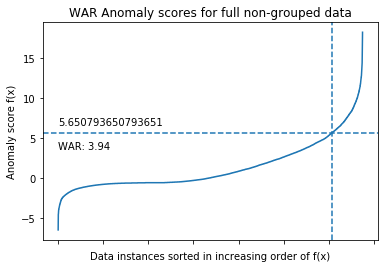

In [21]:
plott = full_WAR_RZ_score_sorted.plot()
plott.set(xlabel = "Data instances sorted in increasing order of f(x)", ylabel = "Anomaly score f(x)", title = "WAR Anomaly scores for full non-grouped data")
plott.axhline(full_WAR_RZ_score_90_perc_WAR, linestyle = '--')
plott.axvline(full_WAR_RZ_score_90_perc_WAR_count, linestyle = '--')
plott.text(0,full_WAR_RZ_score_90_perc_WAR+1,full_WAR_RZ_score_90_perc_WAR,rotation=0)
plott.text(0,full_WAR_RZ_score_90_perc_WAR-2,"WAR: " + str(full_df["WAR"].quantile(0.9)),rotation=0)
#plt.show()

Text(0, 2.4051282051282037, 'WAR: 4.036')

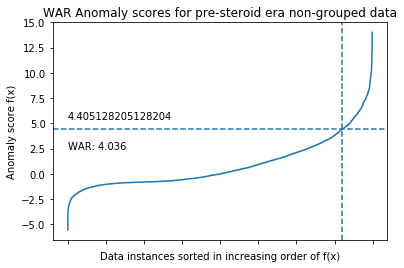

In [22]:
plott = pre_steroid_WAR_RZ_score_sorted.plot()
plott.set(xlabel = "Data instances sorted in increasing order of f(x)", ylabel = "Anomaly score f(x)", title = "WAR Anomaly scores for pre-steroid era non-grouped data")
plott.axhline(pre_steroid_WAR_RZ_score_90_perc_WAR, linestyle = '--')
plott.axvline(pre_steroid_WAR_RZ_score_90_perc_WAR_count, linestyle = '--')
plott.text(0,pre_steroid_WAR_RZ_score_90_perc_WAR+1,pre_steroid_WAR_RZ_score_90_perc_WAR,rotation=0)
plott.text(0,pre_steroid_WAR_RZ_score_90_perc_WAR-2,"WAR: " + str(pre_steroid_df["WAR"].quantile(0.9)),rotation=0)

#plt.show()

Text(0, 4.118644067796609, 'WAR: 3.92')

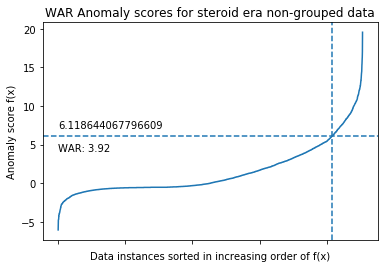

In [23]:
plott = steroid_WAR_RZ_score_sorted.plot()
plott.set(xlabel = "Data instances sorted in increasing order of f(x)", ylabel = "Anomaly score f(x)", title = "WAR Anomaly scores for steroid era non-grouped data")
plott.axhline(steroid_WAR_RZ_score_90_perc_WAR, linestyle = '--')
plott.axvline(steroid_WAR_RZ_score_90_perc_WAR_count, linestyle = '--')
plott.text(0,steroid_WAR_RZ_score_90_perc_WAR+1,steroid_WAR_RZ_score_90_perc_WAR,rotation=0)
plott.text(0,steroid_WAR_RZ_score_90_perc_WAR-2,"WAR: " + str(steroid_df["WAR"].quantile(0.9)),rotation=0)

#plt.show()

Text(0, 4.886792452830187, 'WAR: 3.9')

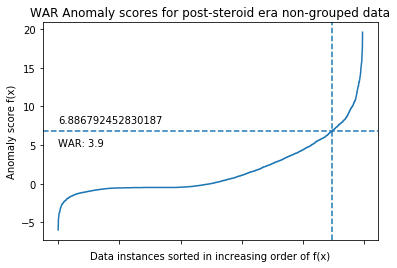

In [24]:
plott = post_steroid_WAR_RZ_score_sorted.plot()
plott.set(xlabel = "Data instances sorted in increasing order of f(x)", ylabel = "Anomaly score f(x)", title = "WAR Anomaly scores for post-steroid era non-grouped data")
plott.axhline(post_steroid_WAR_RZ_score_90_perc_WAR, linestyle = '--')
plott.axvline(post_steroid_WAR_RZ_score_90_perc_WAR_count, linestyle = '--')
plott.text(0,post_steroid_WAR_RZ_score_90_perc_WAR+1,post_steroid_WAR_RZ_score_90_perc_WAR,rotation=0)
plott.text(0,post_steroid_WAR_RZ_score_90_perc_WAR-2,"WAR: " + str(post_steroid_df["WAR"].quantile(0.9)),rotation=0)

#plt.show()

Text(0, 10.591176470588248, 'WAR: 17.652000000000008')

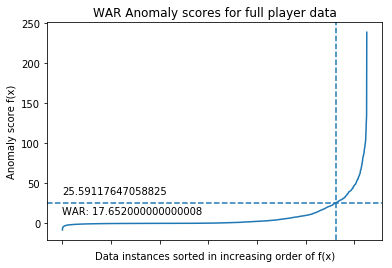

In [25]:
plott = full_player_WAR_RZ_score_sorted.plot()
plott.set(xlabel = "Data instances sorted in increasing order of f(x)", ylabel = "Anomaly score f(x)", title = "WAR Anomaly scores for full player data")
plott.axhline(full_player_WAR_RZ_score_90_perc_WAR, linestyle = '--')
plott.axvline(full_player_WAR_RZ_score_90_perc_WAR_count, linestyle = '--')
plott.text(0,full_player_WAR_RZ_score_90_perc_WAR+10,full_player_WAR_RZ_score_90_perc_WAR,rotation=0)
plott.text(0,full_player_WAR_RZ_score_90_perc_WAR-15,"WAR: " + str(full_player_WAR.quantile(0.9)),rotation=0)

#plt.show()

Text(0, 8.552631578947366, 'WAR: 15.08')

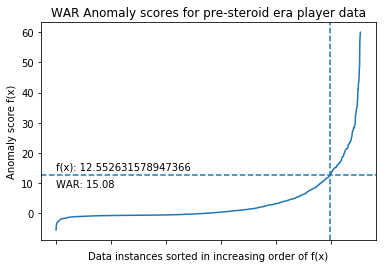

In [26]:
plott = pre_steroid_player_WAR_RZ_score_sorted.plot()
plott.set(xlabel = "Data instances sorted in increasing order of f(x)", ylabel = "Anomaly score f(x)", title = "WAR Anomaly scores for pre-steroid era player data")
plott.axhline(pre_steroid_player_WAR_RZ_score_90_perc_WAR, linestyle = '--')
plott.axvline(pre_steroid_player_WAR_RZ_score_90_perc_WAR_count, linestyle = '--')
plott.text(0,pre_steroid_player_WAR_RZ_score_90_perc_WAR+2,"f(x): " + str(pre_steroid_player_WAR_RZ_score_90_perc_WAR),rotation=0)
plott.text(0,pre_steroid_player_WAR_RZ_score_90_perc_WAR-4,"WAR: " + str(pre_steroid_player_WAR.quantile(0.9)),rotation=0)

#plt.show()

Text(0, 11.97868852459014, 'WAR: 13.596999999999987')

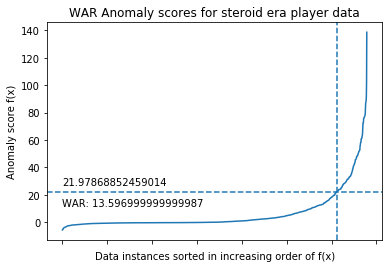

In [27]:
plott = steroid_player_WAR_RZ_score_sorted.plot()
plott.set(xlabel = "Data instances sorted in increasing order of f(x)", ylabel = "Anomaly score f(x)", title = "WAR Anomaly scores for steroid era player data")
plott.axhline(steroid_player_WAR_RZ_score_90_perc_WAR, linestyle = '--')
plott.axvline(steroid_player_WAR_RZ_score_90_perc_WAR_count, linestyle = '--')
plott.text(0,steroid_player_WAR_RZ_score_90_perc_WAR+5,steroid_player_WAR_RZ_score_90_perc_WAR,rotation=0)
plott.text(0,steroid_player_WAR_RZ_score_90_perc_WAR-10,"WAR: " + str(steroid_player_WAR.quantile(0.9)),rotation=0)

#plt.show()

Text(0, 14.664864864864857, 'WAR: 13.823999999999995')

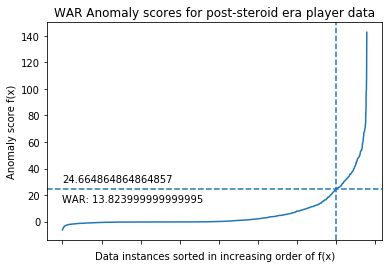

In [28]:
plott = post_steroid_player_WAR_RZ_score_sorted.plot()
plott.set(xlabel = "Data instances sorted in increasing order of f(x)", ylabel = "Anomaly score f(x)", title = "WAR Anomaly scores for post-steroid era player data")
plott.axhline(post_steroid_player_WAR_RZ_score_90_perc_WAR, linestyle = '--')
plott.axvline(post_steroid_player_WAR_RZ_score_90_perc_WAR_count, linestyle = '--')
plott.text(0,post_steroid_player_WAR_RZ_score_90_perc_WAR+5,post_steroid_player_WAR_RZ_score_90_perc_WAR,rotation=0)
plott.text(0,post_steroid_player_WAR_RZ_score_90_perc_WAR-10,"WAR: " + str(post_steroid_player_WAR.quantile(0.9)),rotation=0)

#plt.show()